In [ ]:
! pip install tensorflow scikit-learn pandas numpy pickle5

# Import libraries
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout
import pickle5 as pickle


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.1/132.1 kB 1.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pickle5: filename=pickle5-0.0.11-cp310-cp310-linux_x86_64.whl size=255314 sha256=9846a707d5ac6207b025e46a8a4b878feeb97cd99261e1e910aa0292e36f1e9b
  Stored in directory: /root/.cache/pip/wheels/7d/14/ef/4aab19d27fa8e58772be5c71c16add0426acf9e1f64353235c
Successfully built pickle5


In [ ]:
# Load the dataset
df = pd.read_csv('/content/tripadvisor_hotel_reviews.csv')
print(df.head())

ParserError: Error tokenizing data. C error: EOF inside string starting at row 3867

In [ ]:
# Preprocess the dataset
df = pd.read_csv('/content/tripadvisor_hotel_reviews.csv')
df = df[['Review', 'Rating']]
df['sentiment'] = df['Rating'].apply(lambda x: 'positive' if x > 3 else 'negative' if x < 3 else 'neutral')
df = df[['Review', 'sentiment']]
df = df.sample(frac=1).reset_index(drop=True)
# Tokenize and pad the review sequences
tokenizer = Tokenizer(num_words=5000, oov_token='')
tokenizer.fit_on_texts(df['Review'])
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(df['Review'])
padded_sequences = pad_sequences(sequences, maxlen=100, truncating='post')


# Convert the sentiment labels to one-hot encoding
sentiment_labels = pd.get_dummies(df['sentiment']).values

x_train, x_test, y_train, y_test = train_test_split(padded_sequences, sentiment_labels, test_size=0.2)

# Build the model
model = Sequential()
model.add(Embedding(5000, 100, input_length=100))
model.add(Conv1D(64, 5, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

# Train the model
model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))

# Evaluate the model
y_pred = np.argmax(model.predict(x_test), axis=-1)
print("Accuracy:", accuracy_score(np.argmax(y_test, axis=-1), y_pred))


ParserError: Error tokenizing data. C error: EOF inside string starting at row 11850

In [ ]:
model.save('sentiment_analysis_model.h5')
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# Load the saved model and tokenizer
import keras

model = keras.models.load_model('sentiment_analysis_model.h5')
with open('tokenizer.pickle', 'rb') as handle:
    tokenizer = pickle.load(handle)



In [ ]:
def predict_sentiment(text):
    # Tokenize and pad the input text
    text_sequence = tokenizer.texts_to_sequences([text])
    text_sequence = pad_sequences(text_sequence, maxlen=100)

    # Make a prediction using the trained model
    predicted_rating = model.predict(text_sequence)[0]
    if np.argmax(predicted_rating) == 0:
        return 'Negative'
    elif np.argmax(predicted_rating) == 1:
        return 'Neutral'
    else:
        return 'Positive'


In [ ]:
text_input = "I absolutely loved my stay at that hotel. The staff was amazing and the room was fantastic!"
predicted_sentiment = predict_sentiment(text_input)
print(predicted_sentiment)


1/1 [==============================] - 0s 78ms/step
Positive


In [ ]:
text_input = "This is a great movie I loved it."
predicted_sentiment = predict_sentiment(text_input)
print(predicted_sentiment)


NameError: name 'predict_sentiment' is not defined

In [ ]:
text_input = "Boooo"
predicted_sentiment = predict_sentiment(text_input)
print(predicted_sentiment)

1/1 [==============================] - 0s 24ms/step
Negative


In [ ]:
text_input = "It's really hard to understand explain it again"
predicted_sentiment = predict_sentiment(text_input)
print(predicted_sentiment)

NameError: name 'predict_sentiment' is not defined

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...


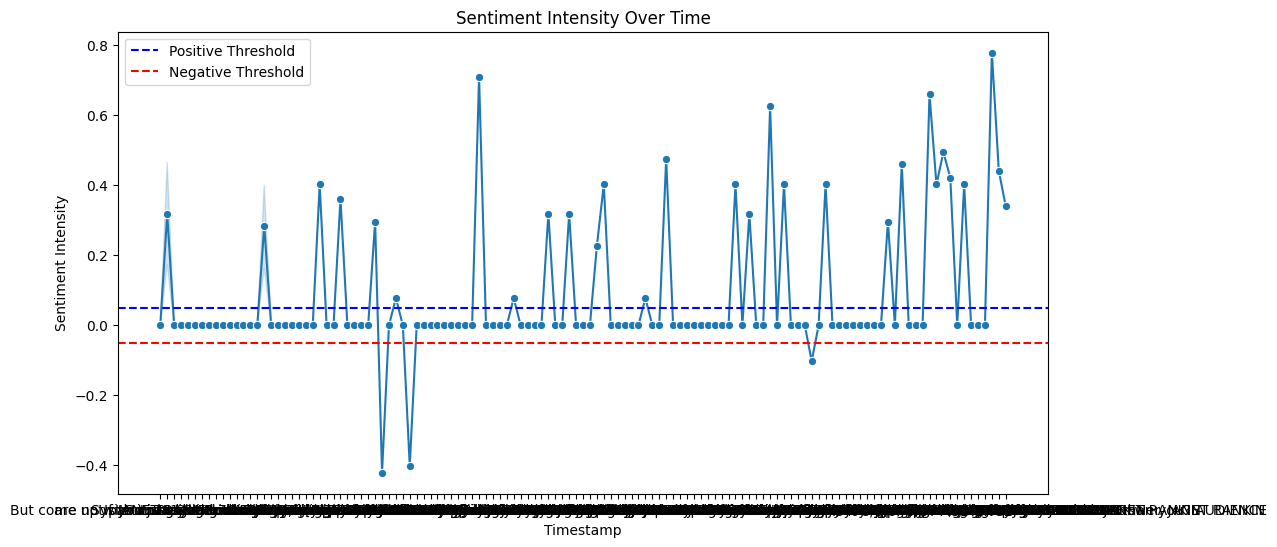


Insights based on sentiment analysis:
At So what do you think about that? AUDIENCE,  expressed negative sentiment: "I'll answer it by saying"
At think that would pay itself off at the end of the-- AUDIENCE,  expressed negative sentiment: "No, the problem there is that you have to face the proposal."
At AUDIENCE,  expressed negative sentiment: "So the problem is that when we are looking at the proposal itself, the time, 2017, this is already the end of 2015."
At JANET RANKIN,  expressed negative sentiment: "3,000 People. Stop and think. Answer this question."
At That's the expectation. AUDIENCE,  expressed negative sentiment: "But what about requiring-- I know it's hard when you have professors that have been doing what they're doing for 25, 30, 40 years."

Overall sentiment distribution:
Positive: 55, Negative: 5, Neutral: 830

The lecture had more positive sentiments overall, indicating good engagement and understanding.


In [ ]:
!pip install vaderSentiment

import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import seaborn as sns

# Load the transcript file
transcript_file = "/MitTranscript.txt"
with open(transcript_file, "r") as file:
    lines = file.readlines()

# Initialize variables to store transcript data
data = {"timestamp": [], "speaker": [], "text": []}
current_speaker = ""

# Process each line in the transcript
for line in lines:
    if ":" in line:
        parts = line.split(":", 1)
        timestamp = parts[0].strip()
        text = parts[1].strip() if len(parts) > 1 else ""

        # Determine speaker based on text content
        if text.isupper():
            current_speaker = text
        else:
            data["timestamp"].append(timestamp)
            data["speaker"].append(current_speaker)
            data["text"].append(text)

# Create a DataFrame from the transcript data
transcript = pd.DataFrame(data)

# Function to clean the text
def clean_text(text):
    import re
    from nltk.corpus import stopwords
    from nltk.stem import WordNetLemmatizer
    import nltk
    nltk.download('stopwords')
    nltk.download('wordnet')

    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()

    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)
    text = text.lower()
    words = text.split()
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    return ' '.join(words)


# Clean the text in the transcript
transcript['text_clean'] = transcript['text'].apply(clean_text)

# Initialize VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Analyze sentiment intensity
transcript['sentiment_scores'] = transcript['text_clean'].apply(lambda x: analyzer.polarity_scores(x))
transcript['compound'] = transcript['sentiment_scores'].apply(lambda x: x['compound'])

# Classify sentiment
transcript['sentiment'] = transcript['compound'].apply(lambda x: 'positive' if x >= 0.05 else ('negative' if x <= -0.05 else 'neutral'))

# Separate lecturer and student segments
lecturer_segments = transcript[transcript['speaker'] == 'Lecturer']
student_segments = transcript[transcript['speaker'] != 'Lecturer']

# Plot sentiment over time for both lecturer and students
plt.figure(figsize=(12, 6))
sns.lineplot(x=transcript['timestamp'], y=transcript['compound'], hue=transcript['speaker'], marker='o')
plt.axhline(y=0.05, color='b', linestyle='--', label='Positive Threshold')
plt.axhline(y=-0.05, color='r', linestyle='--', label='Negative Threshold')
plt.xlabel('Timestamp')
plt.ylabel('Sentiment Intensity')
plt.title('Sentiment Intensity Over Time')
plt.legend()
plt.show()

# Print insights based on sentiment analysis
print("\nInsights based on sentiment analysis:")
for i, row in transcript.iterrows():
    if row['sentiment'] == 'negative' and row['speaker'] != 'Lecturer':
        print(f"At {row['timestamp']}, {row['speaker']} expressed negative sentiment: \"{row['text']}\"")

# Aggregate and provide more insights
positive_count = transcript[transcript['sentiment'] == 'positive'].shape[0]
negative_count = transcript[transcript['sentiment'] == 'negative'].shape[0]
neutral_count = transcript[transcript['sentiment'] == 'neutral'].shape[0]

print("\nOverall sentiment distribution:")
print(f"Positive: {positive_count}, Negative: {negative_count}, Neutral: {neutral_count}")

if negative_count > positive_count:
    print("\nThe lecture had more negative sentiments overall, indicating possible difficulties or disengagement.")
else:
    print("\nThe lecture had more positive sentiments overall, indicating good engagement and understanding.")
